<a href="https://colab.research.google.com/github/tulipgraceson/road-to-machine-learning/blob/master/Support_Vector_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Basics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dataset=pd.read_csv("Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
print(x)
print("\n")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


reshaping Y to a 2d array as the standard scaler only accepts 2d array

In [28]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

sc_y=StandardScaler()
y=sc_y.fit_transform(y)

print(x)
print(y)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [30]:
from sklearn.svm import SVR
reg=SVR(kernel="rbf") #radial basis function kernel
reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result

In [34]:
y_pred=reg.predict(sc_x.transform([[6.5]]))


In [36]:
sc_y.inverse_transform(y_pred)

array([170370.0204065])

In [38]:
y_arr=reg.predict(x)

# visualizing the SVR model

Text(0, 0.5, 'Salary')

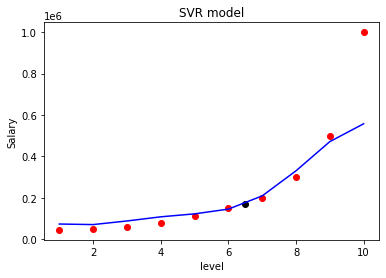

In [49]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color="red")
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(y_arr),color="blue")
plt.scatter([[6.5]],sc_y.inverse_transform(y_pred),color="black")
plt.title("SVR model")
plt.xlabel("level")
plt.ylabel("Salary")